In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

%matplotlib inline 
font ={'size': 12}
plt.rc('font', **font)



In [2]:
datos=pd.read_csv("train.csv", delimiter="," )
datos.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
mediaEdades=round(datos['Age'].mean())
datos['Age']=datos['Age'].fillna(mediaEdades)
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
datos['Cabin']=datos['Cabin'].fillna("NE")
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [9]:
datos['Embarked']=datos['Embarked'].fillna("NE")
datos.isna().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
datos['Embarked'].value_counts() 

S     644
C     168
Q      77
NE      2
Name: Embarked, dtype: int64

In [11]:
datos.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S


In [12]:
varPredictor = ["Survived"]
varTarget= ['Sex']

In [13]:
Predictors=datos[varPredictor]
Target = datos[varTarget] 

In [14]:
#Creamos variables para entrenar nuestro modelo y hacer testeo con un porcentaje especifico  
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size=0.30, random_state=13)

In [15]:
# la utilizamos para crear nuestro arbol de desición 
tree = DecisionTreeClassifier()

In [16]:
# entrenamos nuestro modelo con los datos enviados en la variable tree y la función fit  
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.449\nsamples = 623\nvalue = [212, 411]'),
 Text(0.25, 0.25, 'gini = 0.226\nsamples = 378\nvalue = [49, 329]'),
 Text(0.75, 0.25, 'gini = 0.445\nsamples = 245\nvalue = [163, 82]')]

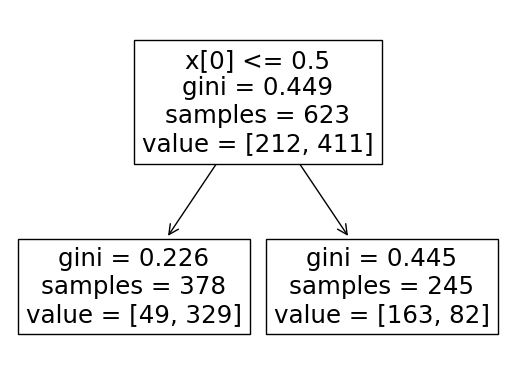

In [17]:
plot_tree(arbol)

In [18]:
predicciones = arbol.predict(X_test)

In [19]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,female,male
Actual,,
female,70,32
male,27,139


In [20]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.7798507462686567

In [21]:
datos['Embarked']=datos['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton


<function matplotlib.pyplot.show(close=None, block=None)>

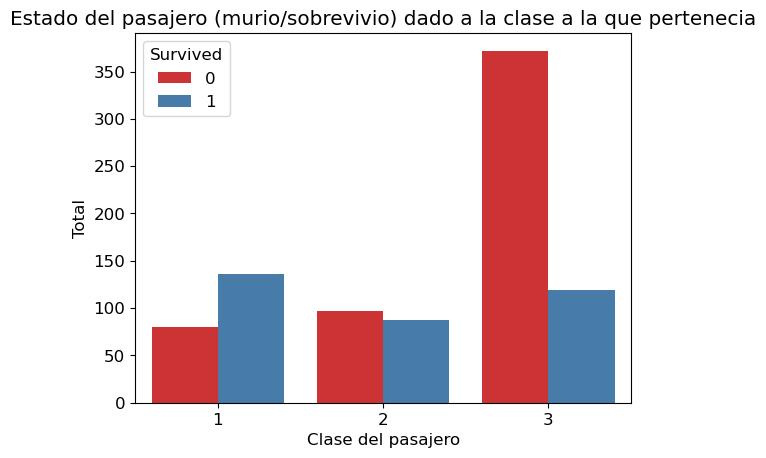

In [22]:
datos.groupby(['Pclass','Survived',])['Survived'].count()
ax=sns.countplot(x='Pclass',hue='Survived',palette='Set1',data=datos)
ax.set(title='Estado del pasajero (murio/sobrevivio) dado a la clase a la que pertenecia',xlabel='Clase del pasajero', ylabel='Total')
plt.show 

In [23]:
datos.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

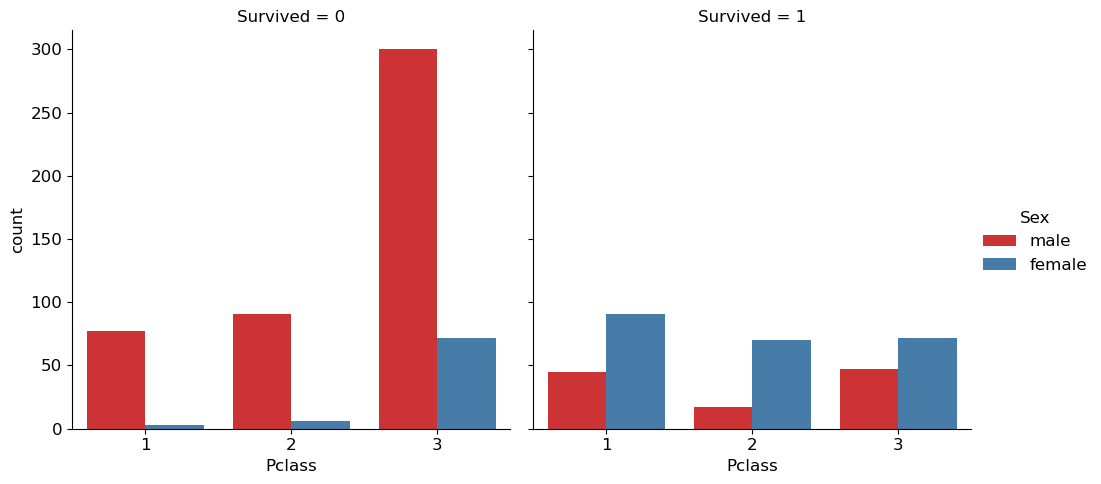

In [24]:
ax=sns.catplot(x='Pclass',hue='Sex',col='Survived',palette='Set1',data=datos,kind='count')
plt.show()

In [25]:
aux=datos.pivot_table(values='Age', index='Cabin', aggfunc='mean')
aux 

,Age
Cabin,
A10,36.00000
A14,30.00000
A16,48.00000
A19,30.00000
A20,49.00000
...,...
F38,30.00000
F4,2.50000
G6,14.75000


NameError: name 'autolabel' is not defined

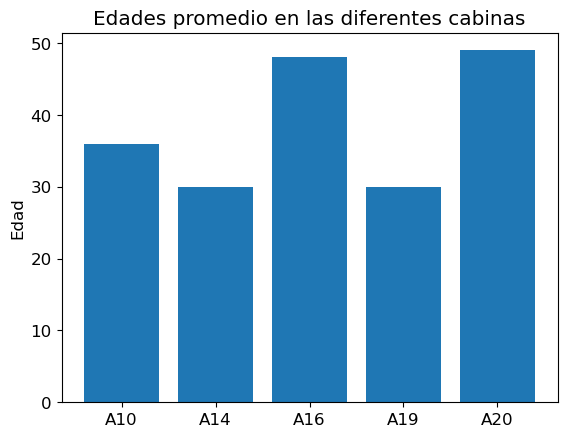

In [26]:
fig, ax=plt.subplots()
ax.set_ylabel('Edad')
ax.set_title('Edades promedio en las diferentes cabinas')
bar1=ax.bar(aux.index[:5].to_list(),aux[:5]['Age'].to_list())

autolabel(bar1)
plt.show()

In [27]:
pd.crosstab(datos['Embarked'], datos['Survived'])

Survived,0,1
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


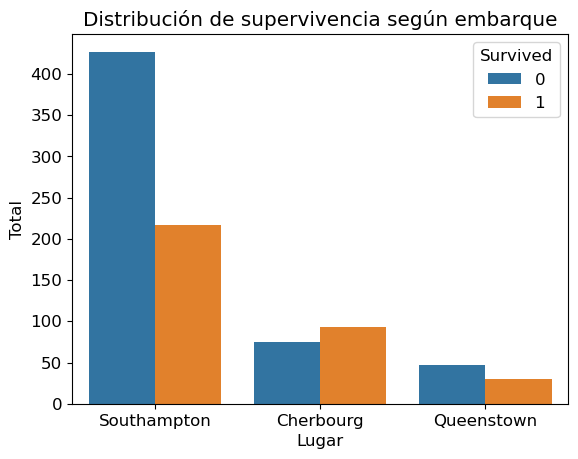

In [28]:
ax=sns.countplot(x='Embarked', hue='Survived',data=datos) 
ax.set(title='Distribución de supervivencia según embarque', xlabel='Lugar',ylabel='Total')
plt.show()